In [1]:
import numpy as np
import sempler.utils
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
def plot_matrix(A, ax=None, vmin=-3, vmax=3, formt="%0.2f", thresh=1e-16, block=False):
    """Plot a heatmap for the given matrix A.

    Parameters
    ----------
    A : numpy.ndarray
        The matrix to plot.
    ax : matplotlib.pyplot.axis, optional
        The axis to plot on; if None, create a new figure.
    vmin : float, default=-3
        The lower threshold for color saturation.
    vmax : float, default=3
        The upper threshold for color saturation.
    formt : string, default="%0.2f"
        The format with which to print the values of the matrix on top
        of the corresponding cell.
    thresh : float, default=1e-16
        Elements of the matrix which are lower than the threshold in
        absolute value are plotted as a zero (i.e. white, no text)
    """
    if ax is None:
        plt.figure()
        ax = plt.gca()
    ax.imshow(A, vmin=vmin, vmax=vmax, cmap='bwr')
    for i in range(len(A)):
        for j in range(len(A)):
            if A[i, j] != 0:
                ax.text(j, i, formt % A[i, j], ha='center', va='center')

In [3]:
directory = "hybrid_experiments/dataset_1658388597_runs:10_seed:42_tag:gaussian_1000_standardize:0_n:10,100,1000/"

In [4]:
original_data = np.load('scratch/gaussian_dataset/test_case_n:1000_g:0_r:0.npy')
original_graph = np.load('scratch/gaussian_dataset/true_graph.npy')

In [5]:
hybrid_data = np.load(directory + 'test_case_n:1000_g:0_r:8.npy')

In [6]:
means0 = [sample.mean(axis=0) for sample in original_data]
covs0 = np.array([np.cov(sample, rowvar=False) for sample in original_data])

means1 = [sample.mean(axis=0) for sample in hybrid_data]
covs1 = np.array([np.cov(sample, rowvar=False) for sample in hybrid_data])

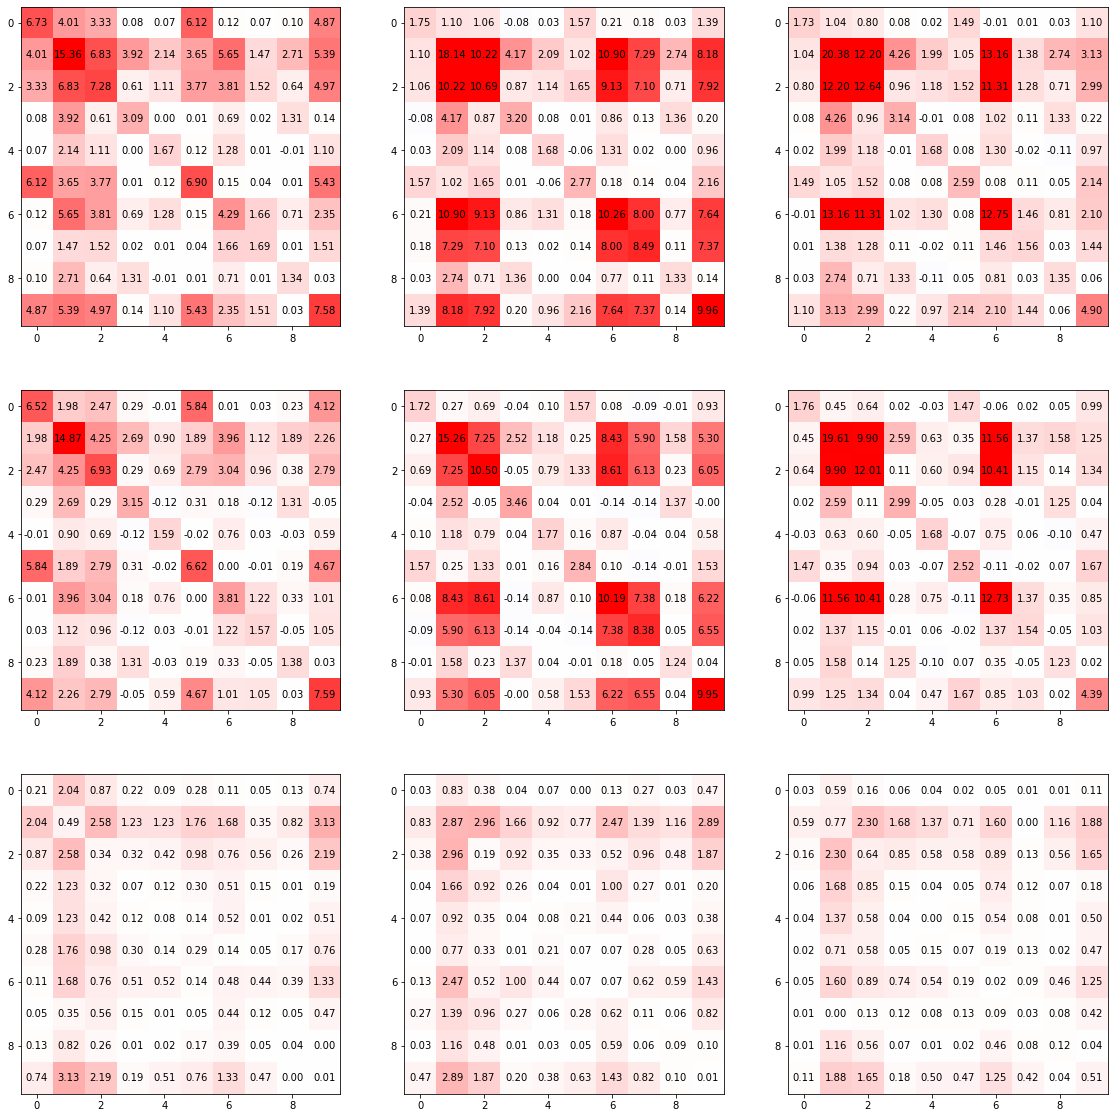

In [7]:
gs = gridspec.GridSpec(3, 3, wspace=0.10, hspace=0.2)
plt.figure(figsize=(20,20))

for i,(mean,cov) in enumerate(zip(means0,covs0)):
    plt.subplot(gs[0,i])
    ax = plt.gca()
    plot_matrix(cov, ax=ax, vmin=-10, vmax=10)    

for i,cov in enumerate(covs1):
    plt.subplot(gs[1,i])
    ax = plt.gca()
    plot_matrix(cov, ax=ax, vmin=-10, vmax=10)
    
for i,cov in enumerate(abs(covs0-covs1)):
    plt.subplot(gs[2,i])
    ax = plt.gca()
    plot_matrix(cov, ax=ax, vmin=-10, vmax=10)

## GaussianNetwork class

In [8]:
from src.bayesian_networks import GaussianNetwork

/home/juan/anaconda3/lib/python3.8/site-packages/rpy2/robjects/vectors.py:1008: UserWarning: R object inheriting from "POSIXct" but without attribute "tzone".
  warnings.warn('R object inheriting from "POSIXct" but without '
/home/juan/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:2187: PytzUsageWarning: The zone attribute is specific to pytz's interface; please migrate to a new time zone provider. For more details on how to do so, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  values, tz_parsed = conversion.datetime_to_datetime64(data.ravel("K"))


In [9]:
network = GaussianNetwork(original_graph, list(original_data))

In [10]:
network.noise_term_means

array([[ 0.02917651, -0.00898784,  0.01101858, -0.0142876 ,  0.06082289,
         0.00048507,  0.00026646, -0.01783982, -0.02683068,  0.12976101],
       [ 0.0583069 ,  0.01218375, -0.10351768, -0.00544123, -0.00839816,
         0.04569672, -0.05986919,  0.10984133, -0.00518113, -0.04785218],
       [ 0.04969906,  0.00101411,  0.04519076,  0.00671569,  0.01369519,
         0.04769355,  0.07721645, -0.09185603,  0.01728897,  0.07703064]])

In [11]:
hybrid_data = network.sample(n=1000)

In [12]:
means0 = [sample.mean(axis=0) for sample in original_data]
covs0 = np.array([np.cov(sample, rowvar=False) for sample in original_data])

means1 = [sample.mean(axis=0) for sample in hybrid_data]
covs1 = np.array([np.cov(sample, rowvar=False) for sample in hybrid_data])

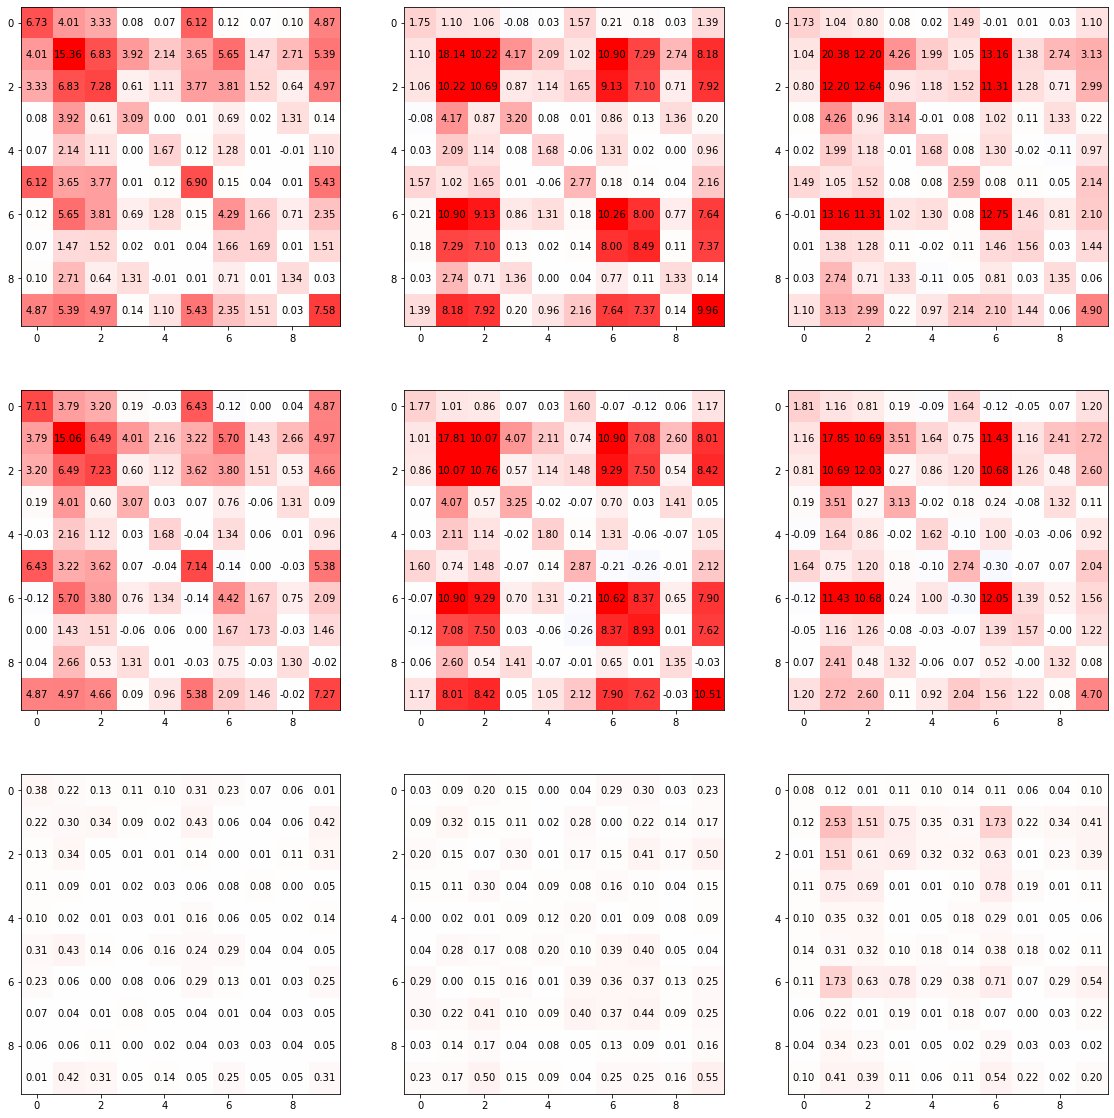

In [13]:
gs = gridspec.GridSpec(3, 3, wspace=0.10, hspace=0.2)
plt.figure(figsize=(20,20))

for i,(mean,cov) in enumerate(zip(means0,covs0)):
    plt.subplot(gs[0,i])
    ax = plt.gca()
    plot_matrix(cov, ax=ax, vmin=-10, vmax=10)    

for i,cov in enumerate(covs1):
    plt.subplot(gs[1,i])
    ax = plt.gca()
    plot_matrix(cov, ax=ax, vmin=-10, vmax=10)
    
for i,cov in enumerate(abs(covs0-covs1)):
    plt.subplot(gs[2,i])
    ax = plt.gca()
    plot_matrix(cov, ax=ax, vmin=-10, vmax=10)